3.5 handling outliers <br />
generally speaking there are four major ways to deal with outliers in datasets <br/>
1. totally remove them 
2. treat outliers as missing values and replace with a data imputation technique (mean/median inputation,end of distribution, mode, missing cat)
3. discretize the data to clump outliers with other data
4. cap/censor the outliers and replace them with maximum/minimum values  

3.5.1 Outlier Trimming

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 

plt.rcParams['figure.figsize'] = [8,6]
sns.set_style('darkgrid')
titanic_data = sns.load_dataset('titanic')

titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot: ylabel='age'>

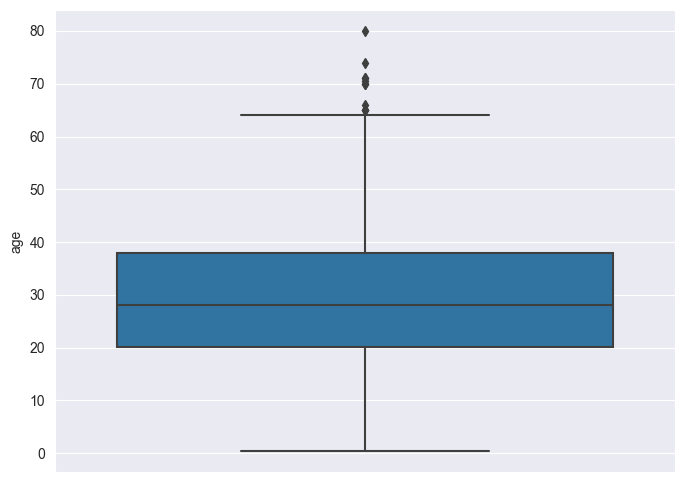

In [15]:
sns.boxplot(y='age',data=titanic_data)

In [16]:
iqr = titanic_data['age'].quantile(0.75) - titanic_data['age'].quantile(0.25)
low_age = titanic_data['age'].quantile(0.25) - 1.5*iqr
up_age = titanic_data['age'].quantile(0.75) + 1.5*iqr

print(low_age)
print(up_age)

-6.6875
64.8125


In [17]:
up_age = 64.8125
low_age = -6.6875

age_outliers = np.where(titanic_data['age'] > up_age, True,
                        np.where(titanic_data['age'] < low_age, True, False))

#print(age_outliers)

In [18]:
titanic_without_age_out = titanic_data.loc[~(age_outliers), ]

print(titanic_data.shape)
print(titanic_without_age_out.shape)

(891, 15)
(880, 15)


In [19]:
titanic_without_age_out.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

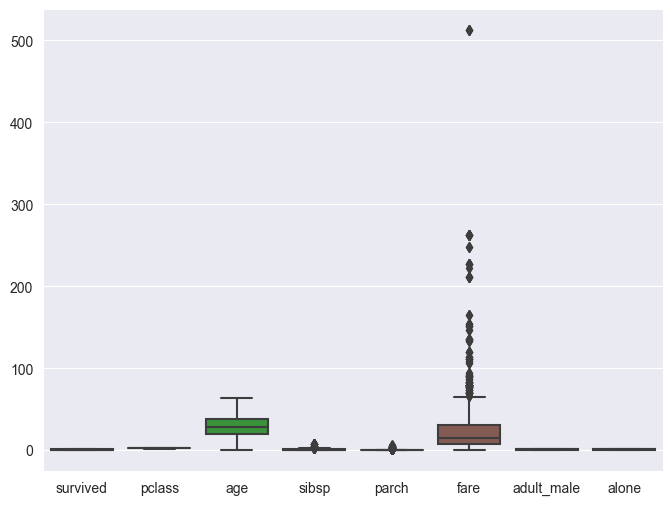

In [20]:
sns.boxplot(titanic_without_age_out)
plt.show()

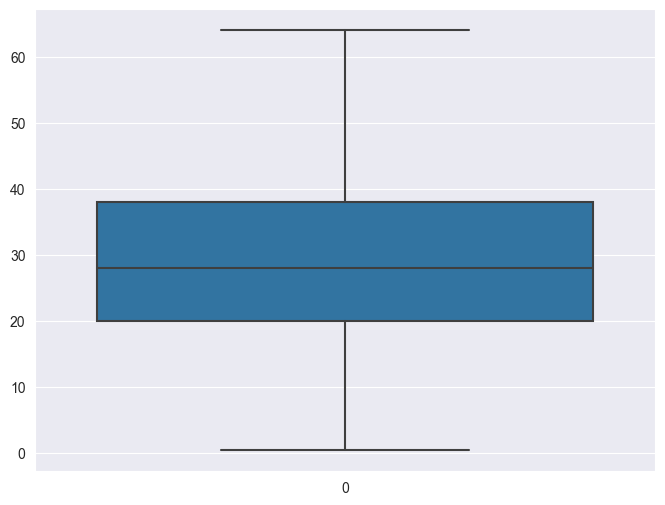

In [21]:
sns.boxplot(titanic_without_age_out['age'])
plt.show()

3.5.2 Outlier capping using mean and std <br />
- mean +/- 3 std

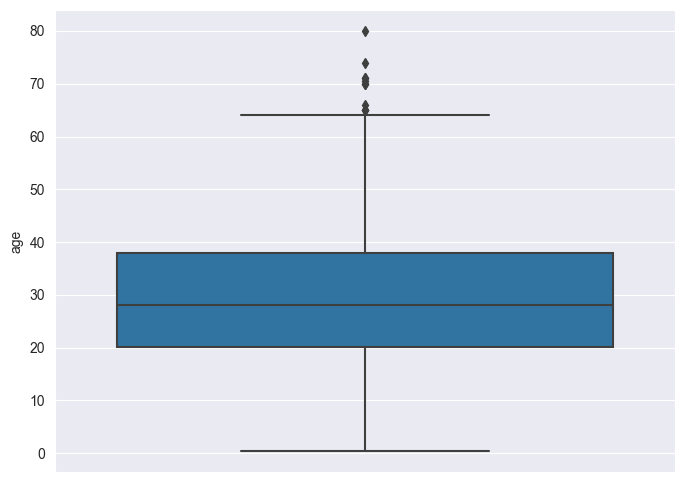

In [22]:
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import numpy as np 

plt.rcParams['figure.figsize'] = [8,6]
sns.set_style('darkgrid')

titanic_data = sns.load_dataset('titanic')

sns.boxplot(y='age', data=titanic_data)
plt.show()

In [23]:
low_bound = titanic_data['age'].mean() - 3 * titanic_data['age'].std()
high_bound = titanic_data['age'].mean() + 3 * titanic_data['age'].std()
print(low_bound, high_bound)

-13.880374349943303 73.27860964406094


In [24]:
age_out_3sd = np.where(titanic_data['age'] > high_bound, True,
                        np.where(titanic_data['age']<low_bound, True,False))

In [25]:
titanic_without_age_out_3sd = titanic_data.loc[(~age_out_3sd), ]

print(titanic_data.shape)
print(titanic_without_age_out_3sd.shape)

(891, 15)
(889, 15)


In [26]:
titanic_data['age'] = np.where(titanic_data["age"]> high_bound, high_bound, 
                        np.where(titanic_data["age"] < low_bound, low_bound, titanic_data["age"]))


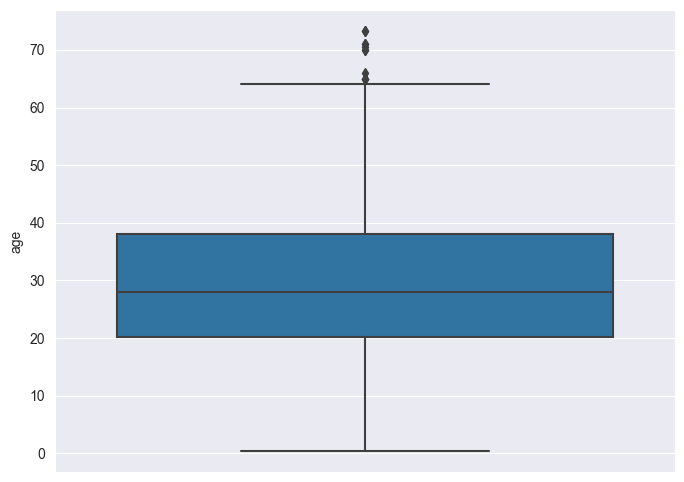

In [28]:
sns.boxplot(y='age', data=titanic_data)
plt.show()